# Fig 5 MRE UMAP and Analysis

This figure makes plots for the RPE projection.


### Initialization

In [1]:
# Import necessary packages
import os
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy.stats import spearmanr
import csv
from datetime import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set verbosity and output package versions
sc.settings.verbosity = 2
sc.logging.print_header()

# Fonts for illustrator
import matplotlib.font_manager as fm

# Optional: confirm font file is in the right place
font_path = os.path.expanduser("/home/dalbao/.fonts/arial.ttf")
fm.fontManager.addfont(font_path)
arial_font = fm.FontProperties(fname=font_path)

# Editable text in PDF outputs
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['font.family'] = arial_font.get_name()

2025-12-10 22:15:47.358336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.24.4 scipy==1.11.3 pandas==2.1.1 scikit-learn==1.1.3 statsmodels==0.14.0 igraph==0.11.3 louvain==0.8.1 pynndescent==0.5.11


Load datasets:

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


['#1f77b4' '#ff7f0e' '#279e68' '#d62728' '#aa40fc' '#8c564b' '#e377c2'
 '#b5bd61' '#17becf' '#aec7e8' '#ffbb78' '#98df8a' '#ff9896' '#c5b0d5'
 '#c49c94' '#f7b6d2']


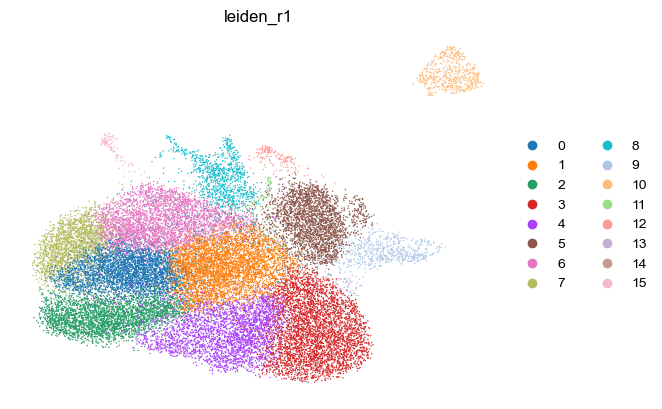

In [2]:
# Set location
os.chdir("/home/dalbao/2023-012-Runx3mutD8scRNA/AlbaoRunx3Manuscript/figures/05")

# Read in the data
adata = ad.read_h5ad("../../h5ad/03_25-12-08-02-28_clustering_MRE.h5ad")

# Check object
adata

# Plot umap with leiden_r1 clustering
sc.pl.umap(adata, color=["leiden_r1"], frameon=False, show=False)

# Colors
print(adata.uns['leiden_r1_colors'])

## Figure UMAP

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


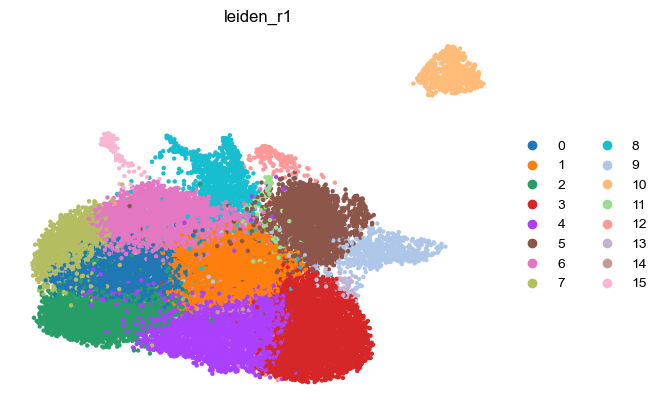

In [3]:
# Plot to PDF
sc.pl.umap(adata, color = 'leiden_r1', frameon = False, size = 40, save = "_Fig5A.pdf")

In [4]:
def plot_highlight_group(adata, group_name, highlight_color, outfile_tag):
    """
    Highlight a single group in adata.obs['group'] on UMAP.
    Ensures highlighted cells are plotted on top.
    """
    # Temporary AnnData used only for plotting
    ad = adata.copy()

    highlight_col = f"highlight_{group_name}"

    # Assign highlight vs other
    ad.obs[highlight_col] = np.where(
        ad.obs["group"] == group_name,
        group_name,
        "Other"
    )

    # Explicitly define category order: Other (bg) first, highlighted second
    ad.obs[highlight_col] = pd.Categorical(
        ad.obs[highlight_col],
        categories=["Other", group_name],
        ordered=True
    )

    # Reorder obs so "Other" rows are drawn first, highlighted last
    ad = ad[ad.obs[highlight_col].cat.codes.argsort()].copy()

    # Colors
    palette = {
        "Other": "lightgrey",
        group_name: highlight_color,
    }

    sc.pl.umap(
        ad,
        color=highlight_col,
        frameon=False,
        size=40,
        palette=palette,
        show=False,
        save=f"_{outfile_tag}.pdf"
    )



# 1) Null = red on top
plot_highlight_group(
    adata, group_name="Null",
    highlight_color="#DC0000",
    outfile_tag="EFig5_shRunx3"
)

# 2) Base = black on top
plot_highlight_group(
    adata, group_name="Base",
    highlight_color="#4A4D4C",
    outfile_tag="EFig5_mock"
)

# 3) WT = green on top
plot_highlight_group(
    adata, group_name="WT",
    highlight_color="#00A087",
    outfile_tag="EFig5_RUNX3OE"
)

# 3) WT = green on top
plot_highlight_group(
    adata, group_name="dAD",
    highlight_color="#3C5488",
    outfile_tag="EFig5_dAD"
)

# 3) WT = green on top
plot_highlight_group(
    adata, group_name="dID",
    highlight_color="#F39B7F",
    outfile_tag="EFig5_dID"
)

# 3) WT = green on top
plot_highlight_group(
    adata, group_name="dVWRPY",
    highlight_color="#4DBBD5",
    outfile_tag="EFig5_dVWRPY"
)


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


## Subset Relevant Clusters

    using 'X_pca' with n_pcs = 75
Storing dendrogram info using `.uns['dendrogram_leiden_r1']`


/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


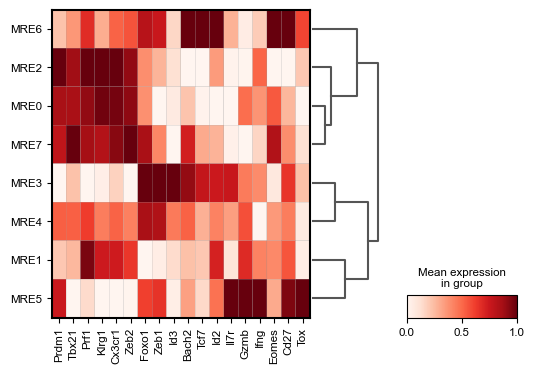

In [5]:
# Create a new object adata_sub.obs which only contains the leiden_r1 groups
# '0', '1', '2', '3', '4', '5', '6'
adata_sub = adata[adata.obs['leiden_r1'].isin(['0', '1', '2', '3', '4', '5', '6', '7'])].copy()

# add the prefix MRE to the leiden_r1 groups
adata_sub.obs['leiden_r1'] = 'MRE' + adata_sub.obs['leiden_r1'].astype(str)

# Reconvert into cateogories
adata_sub.obs['leiden_r1'] = adata_sub.obs['leiden_r1'].astype('category')

genes = [
    "Prdm1",
    "Tbx21",
    "Prf1",
    "Klrg1",
    "Cx3cr1",
    "Zeb2",
    "Foxo1",
    "Zeb1",
    "Id3",
    "Bach2",
    "Tcf7",
    "Id2",
    "Il7r",
    "Gzmb",
    "Ifng",
    "Eomes",
    "Cd27",
    "Tox"
]

# Matrixplot
sc.pl.matrixplot(
    adata_sub,
    var_names=genes,
    groupby="leiden_r1",
    cmap="Reds",
    standard_scale="var",
    figsize=(6, 4),
    dendrogram=True,
    save="test.pdf"
)

## Correlation Heatmap

In [6]:
# Extract expression data and group labels
expression_data = adata_sub.X
group_labels = adata_sub.obs['leiden_r1']

# Filter highly variable genes
highly_variable_genes = adata_sub.var['highly_variable']
expression_data_hvg = expression_data[:, highly_variable_genes]

# Extract std dev for highly variable genes
std_dev = np.std(expression_data_hvg, axis=0)
std_dev[std_dev == 0] = 1e-5  # Add a small value to zero standard deviations

# Scale the expression data for numerical stability
expression_data_hvg = (expression_data_hvg - np.mean(expression_data_hvg, axis=0)) / std_dev 

# Convert to DataFrame
expression_df = pd.DataFrame(expression_data_hvg, index=adata_sub.obs.index, columns=adata_sub.var.index[highly_variable_genes])
expression_df['leiden_r1'] = group_labels.values

# Calculate average expression for each group
group_means = expression_df.groupby('leiden_r1', observed=True).mean()

# Get unique groups
groups = group_means.index.tolist()

Processing groups: MRE0 vs MRE1
Processing groups: MRE0 vs MRE2
Processing groups: MRE0 vs MRE3
Processing groups: MRE0 vs MRE4
Processing groups: MRE0 vs MRE5
Processing groups: MRE0 vs MRE6
Processing groups: MRE0 vs MRE7
Processing groups: MRE1 vs MRE2
Processing groups: MRE1 vs MRE3
Processing groups: MRE1 vs MRE4
Processing groups: MRE1 vs MRE5
Processing groups: MRE1 vs MRE6
Processing groups: MRE1 vs MRE7
Processing groups: MRE2 vs MRE3
Processing groups: MRE2 vs MRE4
Processing groups: MRE2 vs MRE5
Processing groups: MRE2 vs MRE6
Processing groups: MRE2 vs MRE7
Processing groups: MRE3 vs MRE4
Processing groups: MRE3 vs MRE5
Processing groups: MRE3 vs MRE6
Processing groups: MRE3 vs MRE7
Processing groups: MRE4 vs MRE5
Processing groups: MRE4 vs MRE6
Processing groups: MRE4 vs MRE7
Processing groups: MRE5 vs MRE6
Processing groups: MRE5 vs MRE7
Processing groups: MRE6 vs MRE7


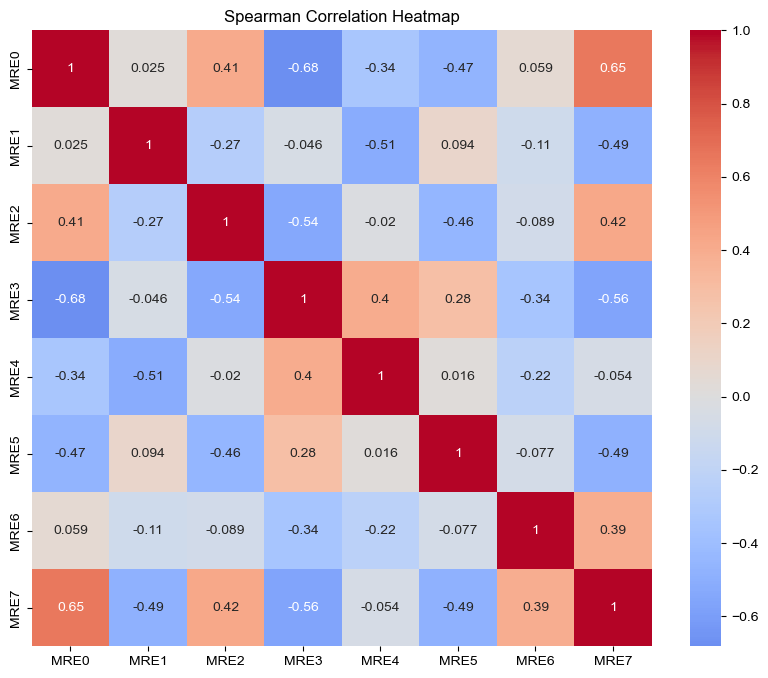

In [7]:
# Calculate Spearman correlation coefficient between all pairs of groups
spearman_correlations = pd.DataFrame(index=groups, columns=groups, dtype=float)

for i, group1 in enumerate(groups):
    mean1 = group_means.loc[group1].values
    for j, group2 in enumerate(groups):
        if i >= j:
            continue
        print(f"Processing groups: {group1} vs {group2}")
        mean2 = group_means.loc[group2].values
        correlation, _ = spearmanr(mean1, mean2)
        spearman_correlations.loc[group1, group2] = correlation
        spearman_correlations.loc[group2, group1] = correlation

# Fill diagonal with 1.0 (self-correlation)
np.fill_diagonal(spearman_correlations.values, 1.0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlations.astype(float), annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

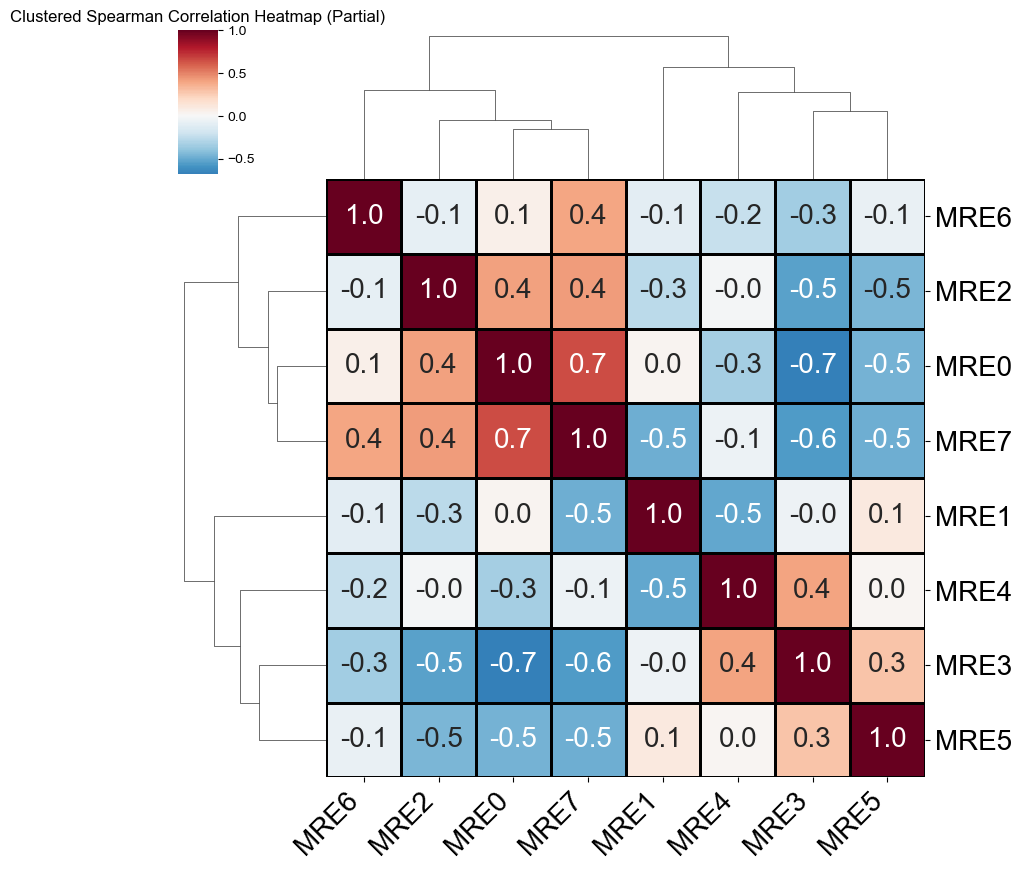

In [8]:
# Clustered heatmap with horizontal and large row labels, no column labels
clustermap = sns.clustermap(
    spearman_correlations.astype(float),
    annot=True,
    cmap='RdBu_r',
    center=0,
    figsize=(8, 8),  # Set width and height to be equal
    dendrogram_ratio=(0.2, 0.2),
    cbar_pos=(0.02, 0.8, 0.05, 0.18),  # Adjust colorbar position
    fmt='.1f',
    annot_kws={"size": 20},
    linewidths=1,  # Add black border
    linecolor='black'  # Set border color to black
)

# Remove half of the rows and columns for display
clustermap.data2d = clustermap.data2d.iloc[:len(clustermap.data2d)//2, :len(clustermap.data2d.columns)//2]

# Adjust row labels: increase font size and rotate
plt.setp(clustermap.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=20)
# Adjust x-axis labels: rotate, align horizontally (hjust), and vertically (yjust)
for label in clustermap.ax_heatmap.xaxis.get_majorticklabels():
    label.set_rotation(45)                            # Rotate 45 degrees
    label.set_horizontalalignment('right')            # hjust = 1 equivalent
    label.set_verticalalignment('top')                # yjust = 0 equivalent
    label.set_fontsize(20)                            # Set font size

plt.title('Clustered Spearman Correlation Heatmap (Partial)')
plt.savefig("figures/correlation_Fig5C.pdf")
plt.show()

## Mean Expressiopn

In [10]:
from scipy import sparse

# -----------------------------
# 1. Subset to highly variable genes
# -----------------------------

# Boolean mask over all genes (length = n_genes_total)
hvg_mask = adata_sub.var["highly_variable"].values.astype(bool)

# List of marker genes to always include
marker_genes = [
    "Klrg1",
    "Il7r",
    "Cx3cr1",
    "Cd27",
    "Bach2",
    "Foxo1",
    "Id3",
    "Lef1",
    "Tcf7",
    "Zeb1",
    "Eomes",
    "Id2",
    "Prdm1",
    "Tbx21",
    "Zeb2",
    "Tox",
    "Prf1",
    "Gzmb",
    "Ifng",
    "Runx1",
    "Runx2",
    "Runx3",
    "Itgae"
]

# Mask for those marker genes (True where var_names is in marker_genes)
marker_mask = adata_sub.var_names.isin(marker_genes)

# Optional: check which requested markers are missing from the data
missing_markers = sorted(set(marker_genes) - set(adata_sub.var_names))
if missing_markers:
    print("Warning: these marker genes are not in adata_sub.var_names:")
    print(missing_markers)

# Combined mask: HVGs OR marker genes
gene_mask = hvg_mask | marker_mask

# Subset AnnData to HVGs only (cells × n_HVGs)
adata_expr = adata_sub[:, gene_mask].copy()

# Get the gene names for HVGs (length = n_HVGs)
hvg_gene_names = adata_sub.var_names[gene_mask]

# -----------------------------
# 2. Convert expression to dense matrix
# -----------------------------

# Extract the expression matrix (may be sparse)
expr_mat = adata_expr.X

# If sparse, convert to dense NumPy array
if sparse.issparse(expr_mat):
    expr_mat = expr_mat.toarray()

# -----------------------------
# 3. Build DataFrame: rows = cells, columns = HVG gene names
# -----------------------------

df_expr = pd.DataFrame(
    expr_mat,                    # shape: (n_cells, n_HVGs)
    index=adata_expr.obs_names,  # cell barcodes / obs names
    columns=hvg_gene_names       # HVG gene symbols/IDs
)

# -----------------------------
# 4. Add group information
# -----------------------------

# Add leiden_r1 as a grouping column
df_expr["group"] = adata_expr.obs["leiden_r1"].values

# -----------------------------
# 5. Compute group-wise mean expression
# -----------------------------

# Group by 'group' and compute mean for each gene
# observed=True avoids unused category levels if group is categorical
df_mean = df_expr.groupby("group", observed=True).mean()

# -----------------------------
# 6. Transpose for readability: rows = genes, columns = groups
# -----------------------------

df_mean = df_mean.transpose()

def tanh_transform(df, scale):
    return np.tanh(df/scale)

df_tanh = tanh_transform(df_mean, scale=1)

# -----------------------------
# 7. (Optional) Save to CSV
# -----------------------------

df_mean.to_csv("../../csv/figure05_MRE_meanExp.csv")
df_tanh.to_csv("../../csv/figure05_MRE_tanhExp.csv")
